In [7]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [8]:
import numpy as np

In [9]:
fish_data=np.column_stack((fish_length,fish_weight))
print(fish_data)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [10]:
fish_target=np.concatenate((np.ones(35),np.zeros(14)))
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
train_input, test_input, train_target, test_target = train_test_split(
    fish_data, fish_target)

In [13]:
print(test_target)

[1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1.]


In [14]:
train_input, test_input, train_target, test_target = train_test_split(
    fish_data, fish_target, stratify=fish_target)

In [15]:
print(test_target)

[1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0.]


In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
kn=KNeighborsClassifier()

In [18]:
kn.fit(train_input,train_target)

KNeighborsClassifier()

In [19]:
kn.score(train_input,train_target)

1.0

In [20]:
kn.predict([[25,150]])

array([0.])

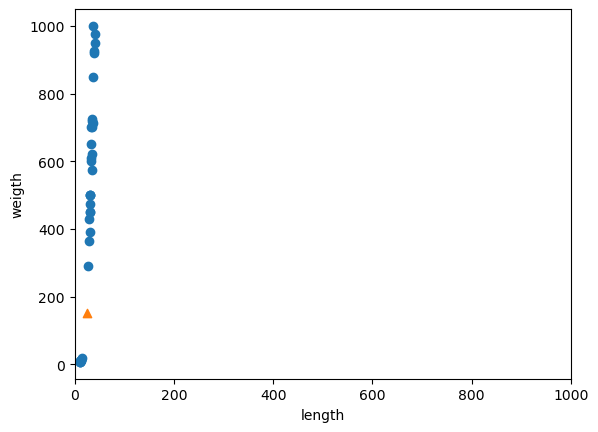

In [21]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25,150,marker='^')
plt.xlim(0,1000)
plt.xlabel("length")
plt.ylabel("weigth")
plt.show()

In [22]:
distances, indexes=kn.kneighbors([[25,150]])

In [23]:
#print(indexes)
train_target[indexes]

array([[0., 0., 0., 1., 0.]])

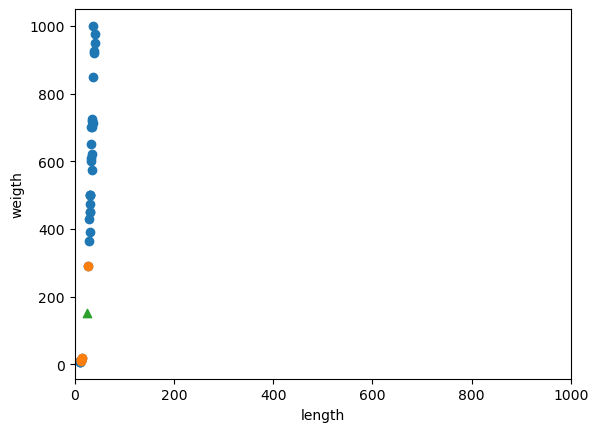

In [25]:
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(train_input[indexes,0],train_input[indexes,1])
plt.scatter(25,150,marker='^')
plt.xlim(0,1000)
plt.xlabel("length")
plt.ylabel("weigth")
plt.show()

In [28]:
mean=np.mean(train_input, axis=0)

std=np.std(train_input, axis=0)


In [29]:
train_scaled=(train_input-mean)/std
print(train_scaled)

[[ 0.82795928  0.76284945]
 [-1.55540553 -1.38488662]
 [ 0.24900426 -0.04106707]
 [ 0.58672802  0.44615506]
 [ 0.22005651 -0.04106707]
 [ 1.16568304  1.40537364]
 [ 0.15251176 -0.10196984]
 [ 1.06919053  1.39014795]
 [-1.39136828 -1.37422864]
 [ 1.31042179  1.55763056]
 [-1.26592802 -1.3513901 ]
 [-1.56505478 -1.38153697]
 [ 0.44198927  0.41570368]
 [-1.58435328 -1.38184149]
 [ 0.73146677  0.79634597]
 [ 0.53848177  0.72021751]
 [ 0.34549677  0.03506138]
 [ 0.68322052  0.47660644]
 [ 0.39374302  0.11118984]
 [ 0.73146677  0.78112028]
 [ 0.31654901  0.11118984]
 [ 0.22005651  0.11118984]
 [ 0.15251176 -0.30599411]
 [-1.70014428 -1.3909769 ]
 [-1.62295028 -1.39006336]
 [-1.46856228 -1.37422864]
 [-0.108018   -0.52828921]
 [ 1.31042179  1.4815021 ]
 [-1.63259953 -1.38854079]
 [ 0.82795928  1.17698826]
 [ 0.58672802  0.56796059]
 [ 0.24900426 -0.22377537]
 [ 0.63497427  0.33957522]
 [-1.50715928 -1.38092794]
 [ 0.73146677  0.72021751]
 [ 0.92445178  1.63375901]]


In [30]:
new=(np.array([25,150])-mean)/std
print(new)

[-0.23345825 -0.95460858]


In [33]:
test_scaled=(test_input-mean)/std

In [34]:
kn.fit(train_scaled, train_target)
kn.score(test_scaled, test_target)

1.0

In [36]:
kn.predict([new])

array([1.])

In [37]:
distances, indexes=kn.kneighbors([new])
print(indexes)

[[26 22 31  6  4]]


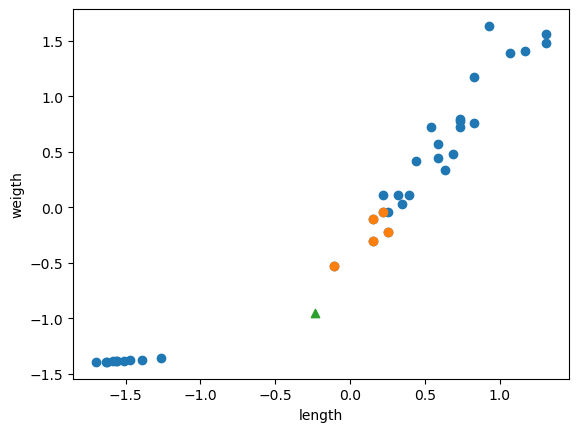

In [38]:
plt.scatter(train_scaled[:,0],train_scaled[:,1])
plt.scatter(train_scaled[indexes,0],train_scaled[indexes,1])
plt.scatter(new[0],new[1],marker='^')
plt.xlabel("length")
plt.ylabel("weigth")
plt.show()

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
ss=StandardScaler()

In [41]:
ss.fit(fish_data)

StandardScaler()

In [44]:
train_scaled=ss.transform(train_input)
test_scaled=ss.transform(test_input)

In [47]:
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

In [48]:
kn.score(test_scaled,test_target)

1.0